In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from xgboost import XGBClassifier

In [73]:
    '''
This is a remaked csv file which contains numerical values for Balance_Limit_V1 column
    bal = df['Balance_Limit_V1']
    for i in range(24000):
        if(re.match(r'.{1,}[M]',bal[i])):
            bal[i] = float("".join(re.findall(r'[0-9]*[.]{0,1}[0-9]+',bal[i])))*1000000
        elif(re.match(r'.{1,}[K]',bal[i])):
            bal[i] = float("".join(re.findall(r'[0-9]*[.]{0,1}[0-9]+',bal[i])))*1000


#This is a remaked csv file which contains numerical values for AGE column

    df['AgeBin'] = 0
    for i in range(24000):
        if(df['AGE'][i]=='Less than 30'):
            df['AgeBin'][i] = 1
        elif(df['AGE'][i]=='31-45'):
            df['AgeBin'][i] = 2
        elif(df['AGE'][i]=='46-65'):
            df['AgeBin'][i] = 3
        elif(df['AGE'][i]=='More than 65'):
            df['AgeBin'][i] = 4
    '''

'\nThis is a remaked csv file which contains numerical values for Balance_Limit_V1 column\nbal = df[\'Balance_Limit_V1\']\nfor i in range(24000):\n    if(re.match(r\'.{1,}[M]\',bal[i])):\n        bal[i] = float("".join(re.findall(r\'[0-9]*[.]{0,1}[0-9]+\',bal[i])))*1000000\n    elif(re.match(r\'.{1,}[K]\',bal[i])):\n        bal[i] = float("".join(re.findall(r\'[0-9]*[.]{0,1}[0-9]+\',bal[i])))*1000\n\n\n#This is a remaked csv file which contains numerical values for AGE column\n\ndf[\'AgeBin\'] = 0\nfor i in range(24000):\n    if(df[\'AGE\'][i]==\'Less than 30\'):\n        df[\'AgeBin\'][i] = 1\n    elif(df[\'AGE\'][i]==\'31-45\'):\n        df[\'AgeBin\'][i] = 2\n    elif(df[\'AGE\'][i]==\'46-65\'):\n        df[\'AgeBin\'][i] = 3\n    elif(df[\'AGE\'][i]==\'More than 65\'):\n        df[\'AgeBin\'][i] = 4\n'

In [74]:
df = pd.read_csv('credit_card_default_train_remake.csv')
df = df.drop('AGE',axis=1) #Removing Age
df.head(30)

,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,...,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,NEXT_MONTH_DEFAULT,AgeBin
0,1000000.0,M,Graduate,Other,-1,-1,-1,-1,-1,-1,...,162772,-13982,3437,6004,39418,162772,0,538165,0,2
1,1000000.0,F,High School,Other,0,-1,-1,-1,-1,0,...,80811,124590,151818,46200,43530,80811,942,33666,0,1
2,100000.0,F,High School,Single,4,3,2,2,-2,-2,...,0,0,0,0,0,0,0,0,1,2
3,200000.0,F,Graduate,Single,2,0,0,0,0,0,...,100353,102740,3855,3890,3696,4620,4049,3918,1,2
4,1000000.0,F,Graduate,Other,2,2,0,0,0,0,...,445271,453899,0,20790,16170,17325,16401,17325,0,2
5,400000.0,F,Graduate,Single,0,0,0,0,0,0,...,356117,358845,16632,18480,12728,13398,13860,12705,0,2
6,100000.0,M,Other,Single,1,2,2,2,2,2,...,12030,12647,0,3696,0,1386,1155,0,0,1
7,100000.0,F,High School,Other,2,2,2,0,0,2,...,59272,57976,5521,0,1984,4844,0,2523,1,1
8,500000.0,M,Other,Other,0,0,0,2,0,0,...,213654,217992,9240,17325,0,6930,11550,11550,0,2
9,1000000.0,M,Other,Single,0,0,2,0,0,0,...,222936,224276,26565,0,8184,8547,8194,7311,0,3


In [75]:
df['SexMar'] = 0

df.loc[((df.Gender == 'M') & (df.MARITAL_STATUS == 'Single')) , 'SexMar'] = 1
df.loc[((df.Gender == 'M') & (df.MARITAL_STATUS == 'Other')) , 'SexMar'] = 2
df.loc[((df.Gender == 'F') & (df.MARITAL_STATUS == 'Single')) , 'SexMar'] = 3
df.loc[((df.Gender == 'F') & (df.MARITAL_STATUS == 'Other')) , 'SexMar'] = 4

df['SexAge'] = 0

df.loc[((df.Gender == 'M') & (df.AgeBin == 1)) , 'SexAge'] = 1
df.loc[((df.Gender == 'M') & (df.AgeBin == 2)) , 'SexAge'] = 2
df.loc[((df.Gender == 'M') & (df.AgeBin == 3)) , 'SexAge'] = 3
df.loc[((df.Gender == 'M') & (df.AgeBin == 4)) , 'SexAge'] = 4
df.loc[((df.Gender == 'F') & (df.AgeBin == 1)) , 'SexAge'] = 5
df.loc[((df.Gender == 'F') & (df.AgeBin == 2)) , 'SexAge'] = 6
df.loc[((df.Gender == 'F') & (df.AgeBin == 3)) , 'SexAge'] = 7
df.loc[((df.Gender == 'F') & (df.AgeBin == 4)) , 'SexAge'] = 8



fil = (df.PAY_JULY == -2) | (df.PAY_JULY == -1) | (df.PAY_JULY == 0)
df.loc[fil, 'PAY_JULY'] = 0
fil = (df.PAY_AUG == -2) | (df.PAY_AUG == -1) | (df.PAY_AUG == 0)
df.loc[fil, 'PAY_AUG'] = 0
fil = (df.PAY_SEP == -2) | (df.PAY_SEP == -1) | (df.PAY_SEP == 0)
df.loc[fil, 'PAY_SEP'] = 0
fil = (df.PAY_OCT == -2) | (df.PAY_OCT == -1) | (df.PAY_OCT == 0)
df.loc[fil, 'PAY_OCT'] = 0
fil = (df.PAY_NOV == -2) | (df.PAY_NOV == -1) | (df.PAY_NOV == 0)
df.loc[fil, 'PAY_NOV'] = 0
fil = (df.PAY_DEC == -2) | (df.PAY_DEC == -1) | (df.PAY_DEC == 0)
df.loc[fil, 'PAY_DEC'] = 0



df['Avg_exp_5'] = ((df['DUE_AMT_NOV'] - (df['DUE_AMT_DEC'] - df['PAID_AMT_NOV']))) / df['Balance_Limit_V1']

df['Avg_exp_4'] = (((df['DUE_AMT_NOV'] - (df['DUE_AMT_DEC'] - df['PAID_AMT_NOV'])) +
                 (df['DUE_AMT_OCT'] - (df['DUE_AMT_NOV'] - df['PAID_AMT_OCT']))) / 2) / df['Balance_Limit_V1']

df['Avg_exp_3'] = (((df['DUE_AMT_NOV'] - (df['DUE_AMT_DEC'] - df['PAID_AMT_NOV'])) +
                 (df['DUE_AMT_OCT'] - (df['DUE_AMT_NOV'] - df['PAID_AMT_OCT'])) +
                 (df['DUE_AMT_SEP'] - (df['DUE_AMT_OCT'] - df['PAID_AMT_SEP']))) / 3) / df['Balance_Limit_V1']

df['Avg_exp_2'] = (((df['DUE_AMT_NOV'] - (df['DUE_AMT_DEC'] - df['PAID_AMT_NOV'])) +
                 (df['DUE_AMT_OCT'] - (df['DUE_AMT_NOV'] - df['PAID_AMT_OCT'])) +
                 (df['DUE_AMT_SEP'] - (df['DUE_AMT_OCT'] - df['PAID_AMT_SEP'])) +
                 (df['DUE_AMT_AUG'] - (df['DUE_AMT_SEP'] - df['PAID_AMT_AUG']))) / 4) / df['Balance_Limit_V1']

df['Avg_exp_1'] = (((df['DUE_AMT_NOV'] - (df['DUE_AMT_DEC'] - df['PAID_AMT_NOV'])) +
                 (df['DUE_AMT_OCT'] - (df['DUE_AMT_NOV'] - df['PAID_AMT_OCT'])) +
                 (df['DUE_AMT_SEP'] - (df['DUE_AMT_OCT'] - df['PAID_AMT_SEP'])) +
                 (df['DUE_AMT_AUG'] - (df['DUE_AMT_SEP'] - df['PAID_AMT_AUG'])) +
                 (df['DUE_AMT_JULY'] - (df['DUE_AMT_AUG'] - df['PAID_AMT_JULY']))) / 5) / df['Balance_Limit_V1']

df['Closeness_6'] = (df.Balance_Limit_V1 - df.DUE_AMT_DEC) / df.Balance_Limit_V1
df['Closeness_5'] = (df.Balance_Limit_V1 - df.DUE_AMT_NOV) / df.Balance_Limit_V1
df['Closeness_4'] = (df.Balance_Limit_V1 - df.DUE_AMT_OCT) / df.Balance_Limit_V1
df['Closeness_3'] = (df.Balance_Limit_V1 - df.DUE_AMT_SEP) / df.Balance_Limit_V1
df['Closeness_2'] = (df.Balance_Limit_V1 - df.DUE_AMT_AUG) / df.Balance_Limit_V1
df['Closeness_1'] = (df.Balance_Limit_V1 - df.DUE_AMT_JULY) / df.Balance_Limit_V1

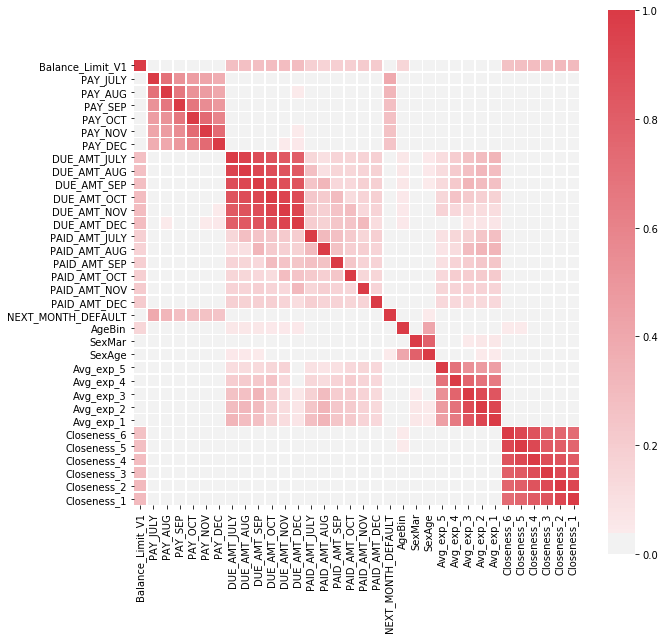

In [82]:
#////////////////////////// Plotting Graphs ////////////////////////////////////
corr = df.corr()
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmin=0,vmax=1, center=0,square=True, linewidths=.5)
#///////////////////////////////////////////////////////////////////////////////

In [76]:
Y = df['NEXT_MONTH_DEFAULT']
X = df.drop(['NEXT_MONTH_DEFAULT','Gender'],axis=1)

In [77]:
label_enc = LabelEncoder()

X['EDUCATION_STATUS'] = label_enc.fit_transform(X['EDUCATION_STATUS'])
X['MARITAL_STATUS'] = label_enc.fit_transform(X['MARITAL_STATUS'])

In [78]:
#///////////////////////// Train-Test Split ////////////////////////////////////

X_Train,X_Test,Y_Train,Y_Test = train_test_split(X,Y,test_size=0.4,random_state=0)

#////////////////////////////////////////////////////////////////////////////////

In [79]:
xgboost = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, n_estimators=60, max_depth=5)
xgboost = xgboost.fit(X_Train,Y_Train)
Y_Pred = xgboost.predict(X_Test)

In [80]:
pred = xgboost.predict_proba(X_Test)[:,1]
pred = (pred > 0.4851).astype(int)
acc=accuracy_score(pred,Y_Test)
f1=f1_score(pred,Y_Test)
cm=confusion_matrix(pred,Y_Test)

In [81]:
print(acc)

0.8263541666666666


In [56]:
#Acuuracy :0.8263541666666666